<a href="https://colab.research.google.com/github/egagli/glacier-velocity-from-sar/blob/main/muldrow_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# muldrow analysis
#http://colab.research.google.com/github 

In [18]:
!pip install geopandas
!pip install rasterio
!pip install rioxarray

In [20]:
!git clone https://github.com/egagli/glacier-velocity-from-sar

fatal: destination path 'glacier-velocity-from-sar' already exists and is not an empty directory.


In [21]:
import geopandas as gpd
import os
import rasterio as rio
from rasterio import plot, mask
import matplotlib.pyplot as plt
import numpy as np
import rioxarray
import pandas as pd
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

In [26]:
geo_crop_dir = '/content/glacier-velocity-from-sar/import_data/import_sar_asf_script/sar_images_geocoded_cropped'

In [28]:
muldrow=gpd.read_file('/content/glacier-velocity-from-sar/import_data/import_glacier_shapefiles_rgi/mt_rainier.geojson')

In [36]:
file_list = []
date_list = []
for file in os.listdir(geo_crop_dir):
    if file != '.ipynb_checkpoints':
        file_list.append(file)
        date = pd.to_datetime(file[14:29])
        date_list.append(date)

In [37]:
date_list.sort()
file_list.sort()

ValueError: ignored

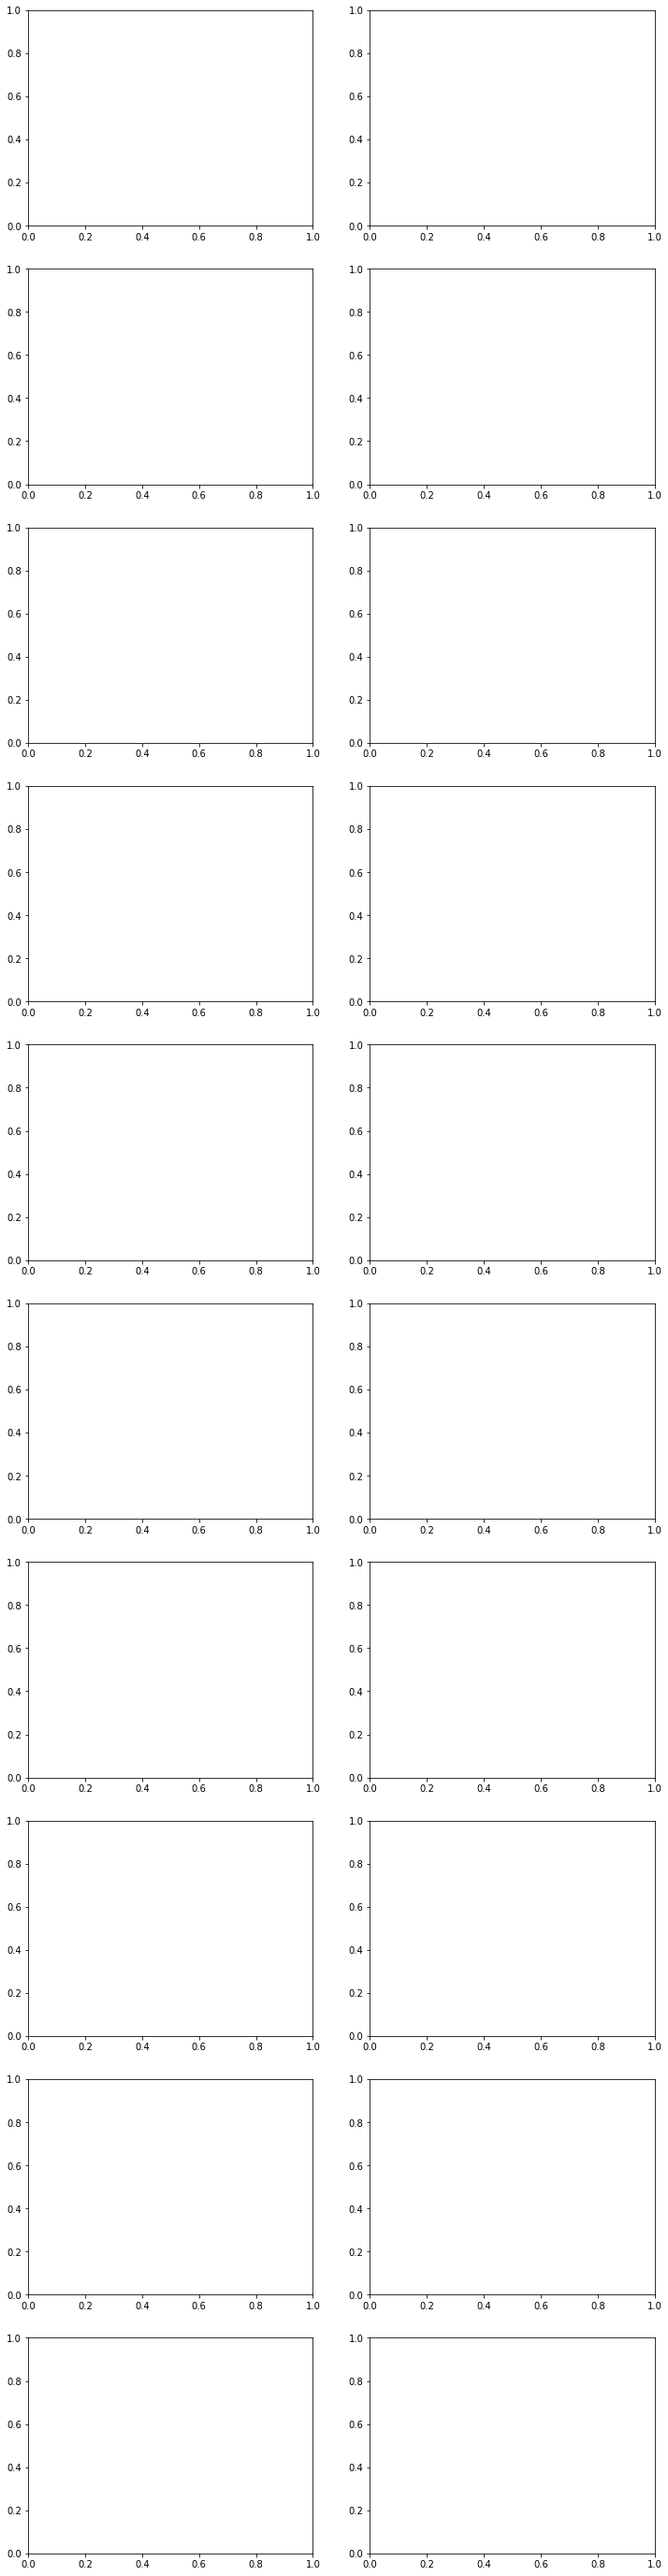

In [38]:
f,ax=plt.subplots(len(file_list),2,figsize=(12,50))
for i,file in enumerate(file_list):
  sar_image_clip = rioxarray.open_rasterio(f'{geo_crop_dir}/{file}',masked=True,from_disk=True).rio.clip(muldrow.geometry,muldrow.crs, drop=False, invert=False)
  sar_image = plt.imread(f'{geo_crop_dir}/{file}')
  color = ax[i,0].imshow(np.log(sar_image,where=(sar_image!=0)),cmap='gray',vmin=0,vmax=9)
  ax[i,0].set_title(date_list[i])
  f.colorbar(color,ax=ax[i,0])
  sar_image_clip = sar_image_clip.squeeze()
  ax[i,1].imshow(np.log(sar_image_clip,where=(sar_image_clip!=0)),cmap='gray',vmin=0,vmax=9)
  ax[i,1].set_title(date_list[i])

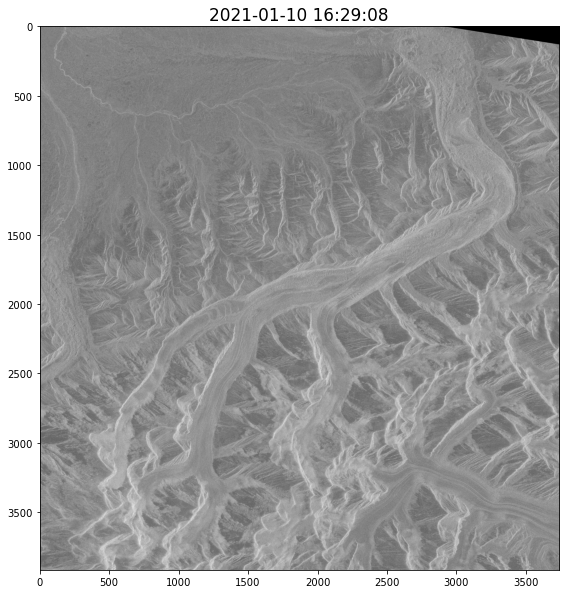

In [ ]:
f,ax=plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size': 14})

sar_image = plt.imread(f'{geo_crop_dir}/{file_list[0]}')
im = ax.imshow(np.log(sar_image,where=(sar_image!=0)),cmap='gray')
ax.set_title(date_list[0])

def update(frame):
    sar_image = plt.imread(f'{geo_crop_dir}/{file_list[frame]}')
    im.set_data(np.log(sar_image,where=(sar_image!=0)))
    ax.set_title(date_list[frame])


ani = FuncAnimation(f, update, frames=len(file_list), blit=False, interval=300)

In [ ]:
HTML(ani.to_jshtml())

In [ ]:
ani.save('muldrow_timeseries.gif', writer='pillow', fps=2)

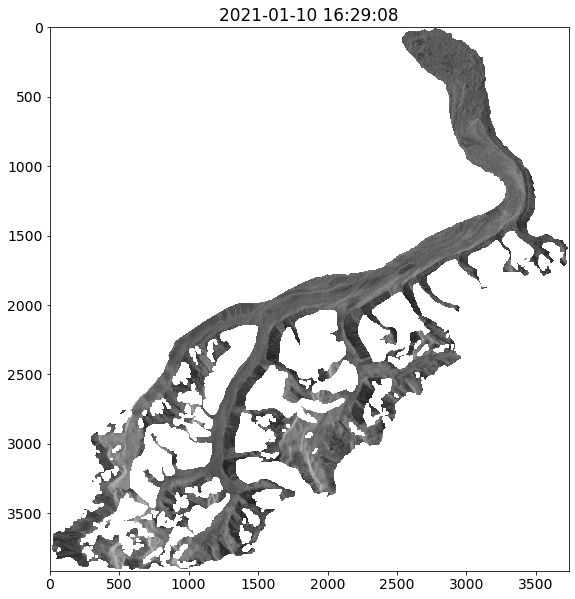

In [ ]:
f,ax=plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size': 14})


sar_image = rioxarray.open_rasterio(f'{geo_crop_dir}/{file_list[0]}',masked=True,from_disk=True).rio.clip(muldrow.geometry,muldrow.crs, drop=False, invert=False).squeeze()
im = ax.imshow(np.log(sar_image,where=(sar_image!=0)),cmap='gray')
ax.set_title(date_list[0])

def update(frame):
    sar_image = rioxarray.open_rasterio(f'{geo_crop_dir}/{file_list[frame]}',masked=True,from_disk=True).rio.clip(muldrow.geometry,muldrow.crs, drop=False, invert=False).squeeze()
    im.set_data(np.log(sar_image,where=(sar_image!=0)))
    ax.set_title(date_list[frame])

ani = FuncAnimation(f, update, frames=len(file_list), blit=False, interval=300)

In [ ]:
HTML(ani.to_jshtml())

In [ ]:
ani.save('muldrow_timeseries_crop.gif', writer='pillow', fps=2)

In [ ]:
#TODO: 